In [1]:
import json
import os
import rootpath
import numpy as np
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import random
from more_itertools import consecutive_groups

In [2]:
root_dir = rootpath.detect()
data_dir = os.path.join(root_dir, "data", "sbs_bic_20-06-29")

In [6]:
root_dir

'/home/yiyi/Documents/masterarbeit/CPD'

In [13]:

def stats_dict(data_dir):
    
    dstats = defaultdict(list)
    stats = defaultdict(dict)
    for foldername in os.listdir(data_dir):
        if foldername=="renovation-related":
            folderpath = os.path.join(data_dir, foldername)
            for subfolder in os.listdir(folderpath):
                subfolderpath = os.path.join(folderpath, subfolder, 'json_file')
                stats['renovation-related_'+ subfolder]={
                    'filenames':[],
                    'num_cpts':[],
                    'len_cpts':[],
                    'std':[],
                    'sentences':[]}
                for filename in os.listdir(subfolderpath):
                    
                    filepath = os.path.join(subfolderpath, filename)
                    if not filename.startswith('.') and os.path.isfile(filepath):
                        print(filepath)

                        with open(filepath) as file:
                            data = json.load(file)
                        
                        
#                         stats['renovation-related_'+ subfolder]['filenames'].append(filename) 
#                         stats['renovation-related_'+ subfolder]['num_cpts'].append(len(data['cpt'])-2)
#                         stats['renovation-related_'+ subfolder]['len_cpts'].append(data['cpt'][-1])
#                         stats['renovation-related_'+ subfolder]['std'].append(np.std(data['sentiment_mean']))
#                         stats['renovation-related_'+ subfolder]['sentences'].append({
#                             nr:len(item) for nr, item in data['sentences'].items()
#                         })
                        
                        num_cpts = len(data['cpt'])-2
                        sentences = data['sentences']
                        keys =[int(key) for key in  sentences.keys()]
                        groups = list(consecutive_groups(keys))
                        
                        if num_cpts>0 and num_cpts<7:
                            if len(groups)==1:
                                dstats['renovation-related_'+ subfolder].append({filename:num_cpts})
                            else:
                                print(filepath)
        else:
            folderpath = os.path.join(data_dir, foldername, 'json_file')

            stats[foldername]={
                'filenames':[],
                'num_cpts':[],
                'len_cpts':[],
                'std':[],
                'sentences':[]
            }
            for filename in os.listdir(folderpath):

                filepath = os.path.join(folderpath, filename)
                if not filename.startswith('.') and os.path.isfile(filepath):
                    print(filepath)

                    with open(filepath) as file:
                        data = json.load(file)
#                     stats[foldername]['filenames'].append(filename)
#                     stats[foldername]['num_cpts'].append(len(data['cpt'])-2)
#                     stats[foldername]['len_cpts'].append(data['cpt'][-1])
#                     stats[foldername]['std'].append(np.std(data['sentiment_mean']))
#                     stats[foldername]['sentences'].append({
#                         nr:len(item) for nr, item in data['sentences'].items()
#                     })
                    num_cpts = len(data['cpt'])-2
                    sentences = data['sentences']
                    keys =[int(key) for key in  sentences.keys()]
                    groups = list(consecutive_groups(keys))
                    if num_cpts>0 and num_cpts<7:
                        if len(groups)==1:
                            dstats[foldername].append({filename:num_cpts})
                        else:
                            print(filepath)
    return stats, dstats
        

In [132]:
dstats['room'][1]

{'411#7f64a254-25a4-4324-9f03-d945ae1d3bfd.json': 2}

In [133]:
len(dstats['room'])

340

In [19]:
cats = ['reception', 'room', 'restaurant', 'facility', 'pool', 'renovation-related_room']

In [20]:
companies_dict=defaultdict(list)
for cat, elems in dstats.items():
    if cat in cats:
        companies_list= dstats[cat]
        for com in companies_list:
            filename, cpts_num = list(com.items())[0]
            companies_dict[filename].append((cat, cpts_num))

    # selected_dict[cat]= random.sample(elems, 70)

In [21]:
len(companies_dict)

440

In [23]:
comp_nr = dict()
nr_comp = defaultdict(list)
for filename, l in companies_dict.items():
    comp_nr[filename]= len(l)
    nr_comp[len(l)].append(filename)

In [28]:
for nr, l in nr_comp.items():
    print(nr, len(l))

5 44
3 103
2 131
4 96
1 56
6 10


In [29]:
nr_comp_dedup = dict()
for nr, comp_ in nr_comp.items():
    if nr==6:
        nr_comp_dedup[nr]= random.sample(list(set(comp_)),10)
    if nr==4 or nr==5:
        nr_comp_dedup[nr]= random.sample(list(set(comp_)),20)
    if nr==1 or nr==2 or nr==3:
        nr_comp_dedup[nr]= random.sample(list(set(comp_)),30)


        
        

In [30]:
nr_comp_dedup

{5: ['260#7ac7c8fa-b90d-41c7-8487-0a3eb650d522.json',
  '110#d186fc6d-1594-42fa-af2d-3c6314b3a7b2.json',
  '327#f8dc7568-0e8b-4747-b062-d2bf4efd66b5.json',
  '401#48ef2279-98c7-44a3-bd0f-865493ff2208.json',
  '319#b89f8ef8-6b9d-4d90-8b03-9ad79580ac66.json',
  '132#40f9cae9-74ee-4ccf-8a6f-64ed9570b353.json',
  '129#4de3c69a-9124-40cd-a89f-37f27bd63e49.json',
  '445#3e32403b-2903-4378-8aa5-4c221ec13cd4.json',
  '136#4ea7ff31-71d7-4532-b8ca-3ab08664c3d5.json',
  '243#91f42d59-1280-42fc-9d98-8db4f96befa7.json',
  '315#ed01916b-4254-4854-bc3b-56dd4b398c62.json',
  '113#d8886492-9e77-4a51-aa5a-91497cfeb22a.json',
  '356#69738c05-d71b-495b-a6e0-c1430151b3ac.json',
  '348#e2b79d0a-7095-4a64-8e34-14019f79d826.json',
  '350#0eb706d3-0ec2-44eb-996d-d7ddf1db795f.json',
  '43#a5a6c25f-9166-465e-8788-9e1d48d2b451.json',
  '368#320f23e4-6a67-4bbe-a057-3b5ce533f138.json',
  '174#39339c1d-1a48-49db-b59a-52cbed1de1f5.json',
  '16#80710d34-34a5-4af8-a4bf-438ae18d3d06.json',
  '305#46e8f78b-74a1-4776-85e8

In [32]:
from itertools import chain

In [33]:
selected_companies = dict()
for company in list(chain.from_iterable(list(nr_comp_dedup.values()))):
    selected_companies[company]= companies_dict[company]

In [38]:
with open('selected_companies.json', 'w') as writer:
    json.dump(selected_companies, writer)

In [39]:
len(selected_companies)

140

In [36]:
Counter(comp_nr.values())

Counter({5: 44, 3: 103, 2: 131, 4: 96, 1: 56, 6: 10})

In [124]:
companies =defaultdict(list)
for cat_, l in selected_dict.items():
    for i in l:
        k,v = list(i.items())[0]
        companies[k].append((cat_, v))
    counter = Counter([v for i in l for _,v in i.items() ])
    cpts_sum = sum([v for i in l for _,v in i.items() ])
    print(cat_, counter, cpts_sum)

facility Counter({1: 33, 2: 20, 3: 8, 4: 6, 5: 2, 6: 1}) 137
reception Counter({1: 29, 2: 17, 5: 8, 3: 7, 4: 5, 6: 4}) 168
pool Counter({1: 41, 2: 14, 3: 7, 5: 5, 4: 2, 6: 1}) 129
renovation-related_room Counter({1: 51, 2: 15, 3: 3, 5: 1}) 95
restaurant Counter({2: 29, 1: 27, 3: 10, 4: 4}) 131
room Counter({1: 25, 3: 17, 2: 15, 4: 7, 5: 4, 6: 2}) 166


In [ ]:
companies

In [109]:
len(set(companies))

286

In [16]:
num_dict={}
for category, stat in dstats.items():
    non_zero = list(map(lambda x: x>0 and x<7, stat['num_cpts']))
    all_ten = list(map(lambda x: all([y==10 for y in x.values()]), stat['sentences']) )
    num_dict[category]= len(non_zero)
    
    print(category, len(non_zero), len(all_ten))
    

TypeError: list indices must be integers or slices, not str

In [71]:
sorted_num_dict = sorted(num_dict.items(), key=lambda x:x[1], reverse=True)

In [72]:
sorted_num_dict

[('reception', 457),
 ('room', 457),
 ('restaurant', 456),
 ('atmosphere', 455),
 ('facility', 454),
 ('family', 453),
 ('price', 453),
 ('fitness', 452),
 ('pool', 452),
 ('parking', 451),
 ('venue', 447),
 ('renovation-related_room', 445),
 ('renovation-related_reception', 433),
 ('entertainment', 428),
 ('beach', 421),
 ('renovation-related_facility', 419),
 ('renovation-related_restaurant', 401),
 ('renovation-related_price', 364),
 ('renovation-related_atmosphere', 324),
 ('renovation-related_pool', 323),
 ('renovation-related_fitness', 314),
 ('renovation-related_family', 257),
 ('renovation-related_venue', 204),
 ('renovation-related_parking', 192),
 ('renovation-related_beach', 171),
 ('renovation-related_entertainment', 83)]

In [92]:
sampled_dict ={}
for cateogry, elems in dstats.items():
    print(category)
    if category in categories:
        sampled_dict[category]= random.sample(elems, 70)

price
price
price
price
price
price
price
price
price
price
price
price
price
price
price
price
price
price
price
price
price
price
price
price
price
price


In [87]:
sampled_dict

{}

In [14]:
stat_d, dstats= stats_dict(data_dir)

/home/yiyi/Documents/masterarbeit/CPD/data/sbs_bic_20-06-29/facility/json_file/481#f67076ed-3a35-4e18-928f-7148e087cdda.json
/home/yiyi/Documents/masterarbeit/CPD/data/sbs_bic_20-06-29/facility/json_file/411#7f64a254-25a4-4324-9f03-d945ae1d3bfd.json
/home/yiyi/Documents/masterarbeit/CPD/data/sbs_bic_20-06-29/facility/json_file/411#7f64a254-25a4-4324-9f03-d945ae1d3bfd.json
/home/yiyi/Documents/masterarbeit/CPD/data/sbs_bic_20-06-29/facility/json_file/267#0ed315c4-9b7b-4423-a320-04cdca7d97ad.json
/home/yiyi/Documents/masterarbeit/CPD/data/sbs_bic_20-06-29/facility/json_file/128#2b33f2dc-959b-4fef-ae12-32efd121de32.json
/home/yiyi/Documents/masterarbeit/CPD/data/sbs_bic_20-06-29/facility/json_file/477#a8343025-2d79-4d6b-8194-d10eb0a7b4f2.json
/home/yiyi/Documents/masterarbeit/CPD/data/sbs_bic_20-06-29/facility/json_file/477#a8343025-2d79-4d6b-8194-d10eb0a7b4f2.json
/home/yiyi/Documents/masterarbeit/CPD/data/sbs_bic_20-06-29/facility/json_file/424#943ed79d-1f99-461b-ac69-7c69dd4fe049.json


In [49]:
import seaborn as sns
from scipy import stats

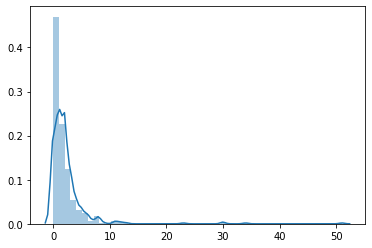

In [52]:
sns.distplot(dstats['room']['num_cpts'])

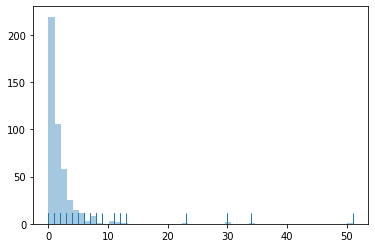

In [53]:
sns.distplot(dstats['room']['num_cpts'], kde=False, rug=True)

In [54]:
from collections import Counter

counter_num_cpts = Counter(dstats['room']['num_cpts'])

In [55]:
counter_num_cpts

Counter({4: 25,
         2: 106,
         0: 94,
         3: 58,
         6: 11,
         1: 125,
         12: 2,
         8: 8,
         5: 15,
         11: 3,
         13: 1,
         30: 2,
         23: 1,
         7: 3,
         51: 1,
         9: 1,
         34: 1})